# Logistisk regresjon

Tidligere har vi sett på klassifisering med *K Nærmeste Naboer*. Men KNN er bare en av mange algoritmer for å klassifisere data basert på tallegenskaper.
En annen måte å gjøre klassifisering på er å bruke regresjon litt sånn som vi så på på starten av kurset.  La oss først se på et 1 dimensjonalt eksempel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

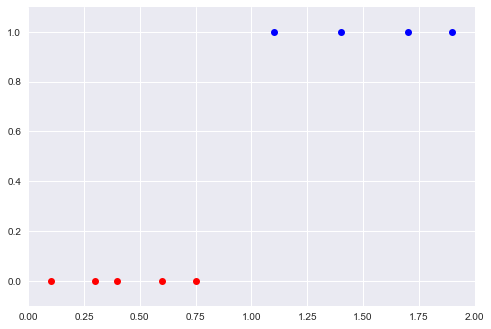

In [2]:
# vi lager litt eksempel data for plotting
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1])

# henter ut hver klasse i egne variable for plotting
x0 = x[y==0]
y0 = y[y==0]

x1 = x[y==1]
y1 = y[y==1]

# plotte data
plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')
plt.axis([0,2,-0.1,1.1])
plt.show()

Her er alle eksemplene med klasse "RØD" satt 0 på y aksen og eksemplene med klasse "BLÅ" er satt til 1. Vi ønsker å finne hvor skillet mellom klassene går. Den enkleste løsningen vil være linær regresjon. Alt vi trenger å gjøre er å tilpasse en linje til punktene som før. Så kan vi *terskle* linja. Det betyr at vi kan si at der linja er over en hvis grense. f.eks 0.5 er det klasse "BLÅ" og ellers er det klasse "RØD"

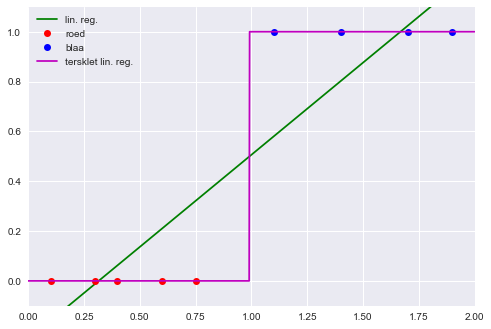

In [3]:
# importere LinearRegression
from sklearn.linear_model import LinearRegression 

# lage og trene modellen
reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

# lage en linje for plotting
t = np.linspace(0,2,1001)
l = reg.predict(t[:,np.newaxis])

plt.figure() # opprette ny figur
plt.plot(t,l,'g-') # tegne modellen som linje
plt.plot(x0,y0,'ro') # tegne den røde klassen
plt.plot(x1,y1,'bo') # tegne den blå klassen 
plt.axis([0,2,-0.1,1.1]) # justere aksene
plt.plot(t,l>=0.5,'m-')
plt.legend(['lin. reg.','roed','blaa','tersklet lin. reg.'],loc=2)
plt.show()

Hvis man nå vil finne klassen til et nytt punkt, f.eks. 1.2, sjekker man først hvilken verdi man får for den grønne linja. I vårt tilfelle er det ca. 0.7. Så sjekker man om det er over terskelen på 0.5. Hvilket det er. Da bestemmer man at klassen er "BLÅ". 

Eventuelt kan man se direkte på den lilla linja som representerer resultatet av tersklingen. Matematisk blir dette det samme. 

Et problem er at linja passer ganske dårlig til dataene og vil bli veldig forskjellig allerede hvis vi legger til et lite punkt. 

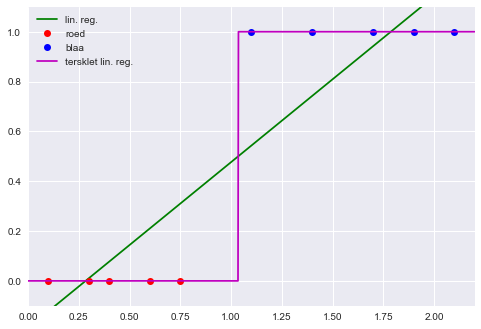

In [4]:
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9,2.1])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1,1])

x0 = x[y==0]
y0 = y[y==0]

x1 = x[y==1]
y1 = y[y==1]

# lage og trene modellen
reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

# lage en linje for plotting
t = np.linspace(0,2.2,1001)
l = reg.predict(t[:,np.newaxis])

plt.figure() # opprette ny figur
plt.plot(t,l,'g-') # tegne modellen som linje
plt.plot(x0,y0,'ro') # tegne den røde klassen
plt.plot(x1,y1,'bo') # tegne den blå klassen 
plt.axis([0,2.2,-0.1,1.1]) # justere aksene
plt.plot(t,l>=0.5,'m-')
plt.legend(['lin. reg.','roed','blaa','tersklet lin. reg.'],loc=2)
plt.show()

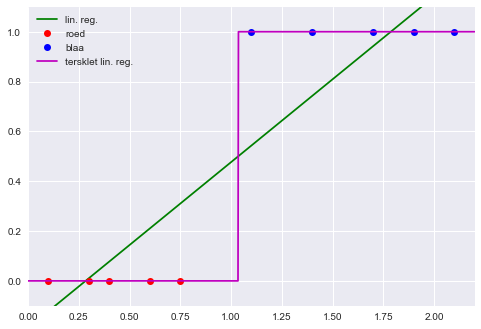

In [5]:
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9,2.1])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1,1])

x0 = x[y==0]
y0 = y[y==0]

x1 = x[y==1]
y1 = y[y==1]

# lage og trene modellen
reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

# lage en linje for plotting
t = np.linspace(0,2.2,1001)
l = reg.predict(t[:,np.newaxis])

plt.figure() # opprette ny figur
plt.plot(t,l,'g-') # tegne modellen som linje
plt.plot(x0,y0,'ro') # tegne den røde klassen
plt.plot(x1,y1,'bo') # tegne den blå klassen 
plt.axis([0,2.2,-0.1,1.1]) # justere aksene
plt.plot(t,l>=0.5,'m-')
plt.legend(['lin. reg.','roed','blaa','tersklet lin. reg.'],loc=2)
plt.show()

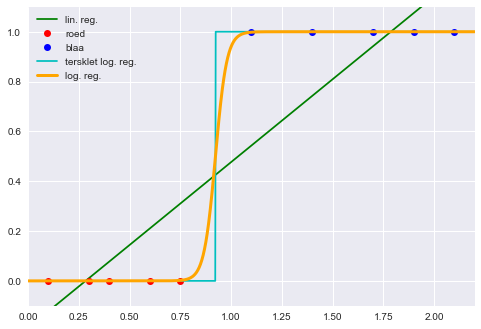

In [6]:
from sklearn.linear_model import LogisticRegression 

reg2 = LogisticRegression(C=1e5)
reg2.fit(x[:,np.newaxis],y)

# Logistisk funksjon er litt utenfor dette kursets tema, så vi har laget en ferdig 
# matematisk funksjon for det. Du trenger ikke å forstå detaljene her
def logistic_model(x):
    return 1 / (1 + np.exp(-x))

loss = logistic_model(t * reg2.coef_ + reg2.intercept_).ravel()

plt.figure() # opprette ny figur
plt.plot(t,l,'g-') # tegne modellen som linje
plt.plot(x0,y0,'ro') # tegne den røde klassen
plt.plot(x1,y1,'bo') # tegne den blå klassen 
plt.plot(t,loss>=0.5,'c-') # plotte terskel
plt.plot(t, loss, color='orange', linewidth=3) # plotte logistisk funksjon

plt.axis([0,2.2,-0.1,1.1]) # justere aksene
plt.legend(['lin. reg.','roed','blaa','tersklet log. reg.','log. reg.'],loc=2)
plt.show()

## Logistisk regresjon for flere dimensjoner
Hittil har vi kun sett på logistisk regresjon klassifisering for en 1-dimensjonal egenskap. Men i praksis har vi gjerne flere egenskaper. Prinsippet er det samme, men i stedet for å tilpasse en linje tilpasser man en høyere dimensjons grense, for eksempel et plan. Under er en figur som viser en 
logistisk regresjons-grense i to dimensjoner

<IPython.core.display.Javascript object>


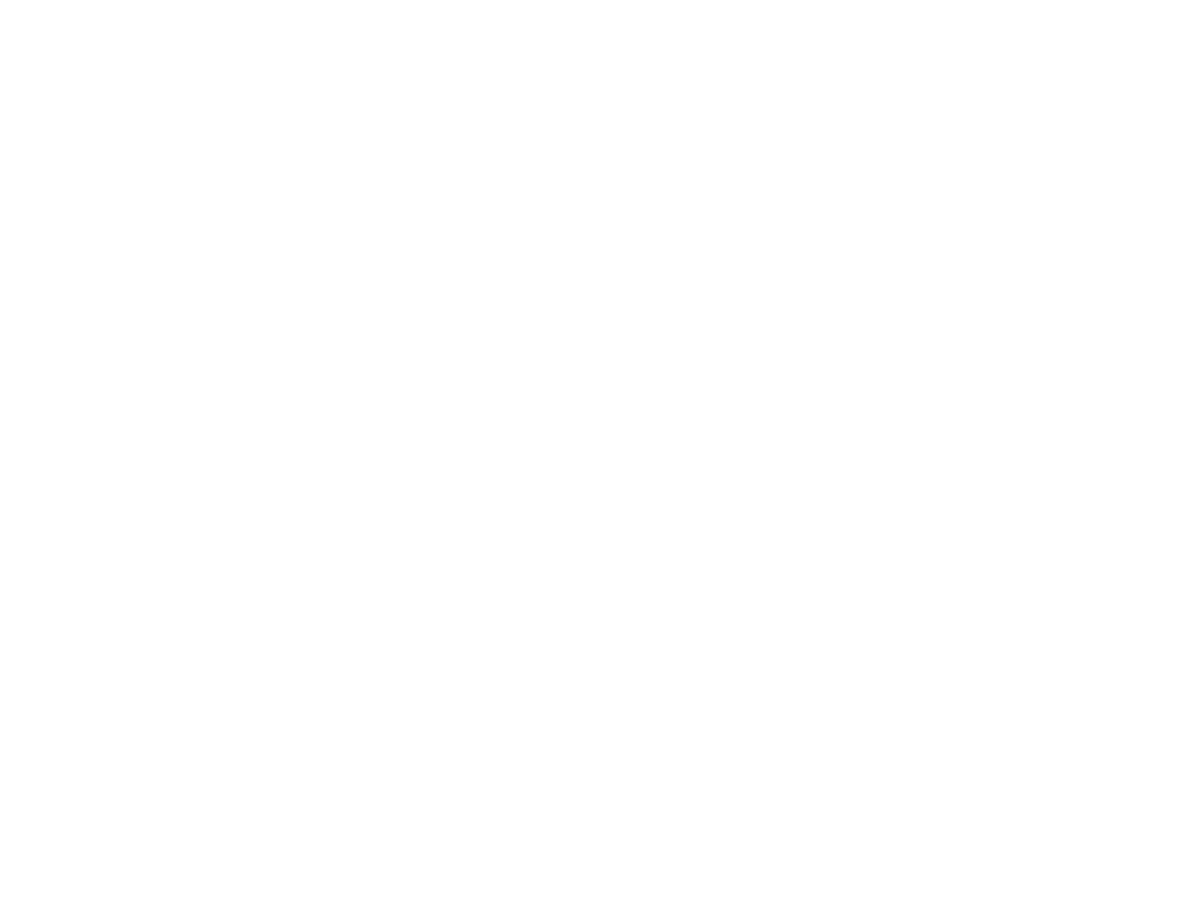

In [7]:
import pandas as pd

# les inn eksempeldata
example_data = pd.read_csv('../../datasets/small_examples/example1.csv')

# skru på interaktive plot
% matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D # importere verktøy for 3d plot

# lage og trene klassifikator
clf_log = LogisticRegression(C=1e5)
clf_log.fit(example_data[['0','1']],example_data['2'])

# lage ny figur og tegne 3d scatterplot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(example_data['0'][example_data['2']==0], example_data['1'][example_data['2']==0],
           example_data['2'][example_data['2']==0],facecolors='r')
ax.scatter(example_data['0'][example_data['2']==1], example_data['1'][example_data['2']==1],
           example_data['2'][example_data['2']==1],facecolors='b')

# regne ut beslutningsplanet
x = y = np.arange(-4, 4, 0.5)
X, Y  = np.meshgrid(x, y)
def model2d(c,b,x,y):
    return logistic_model(c[0]*x + c[1]*y + b)
Z = model2d(clf_log.coef_[0],clf_log.intercept_,X,Y)

# plotte beslutningsplanet som en wireframe
ax.plot_wireframe(X, Y, Z,color ='k')
plt.show()

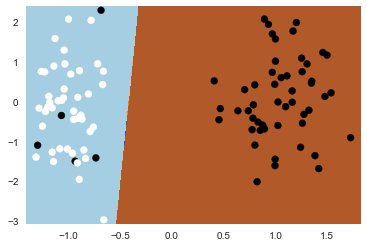

In [8]:
# Vi må importere litt for å kunne bruke hjelpefunksjoner
import sys
import os
sys.path.append(os.path.split(os.path.abspath(os.getcwd()))[0])
from useful_tools import plot_boundary

# skru av interaktive plot
% matplotlib inline

plt.figure() # ny figur
plot_boundary(example_data[['0','1']],clf_log,padding=0.1,plot_step=0.005) # tegne grense
plt.scatter(example_data[['0']], example_data[['1']], marker='o', c=example_data['2']) # tegne scatterplot
plt.show()


Siden logistisk regresjon alltid terskler, hvilket fungerer som et slags "kutt", så vil beslutningsgrensa **alltid bli en rett strek**. 

## Logistisk regresjon i kode

Scikit learn har en ferdig pakke for logistisk regresjon også. Den heter `LogisticRegression` og importeres fra `sklearn.linear_model`. Du kan lage en logistisk regresjon klassifikator med `LogisticRegression()` og trene den som før med `.fit(x,y)`

**Oppgave 8** Tren en logistisk regresjon kode på irisdatasettet. 

*Irisdatasettet er et datasett med egenskaper for klassifisering av irisblomster. Datasettet ble først introdusert av en biolog og matematiker ved navn Ronald Fisher i 1936 og har siden den gang blitt brukt gjentatte ganger for å teste og visualisere maskinlæringsteknikker. Hvis du vil vite mer om irisdatasettet kan du lese mer <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">her</a>. Nå er det din tur til å gå i generasjoner med maskinlæringsekseperter sine fotspor og prøve å klassifisere irisblomstene ut fra lengde og bredde på kronbladene *

**Hint:**
Første steg er å lese inn datasettet fra `'..\..\datasets\iris-species\Iris.csv'`og hente ut kollonene med egenskapene `SepalWidthCm` og `PetalLengthCm`. Du må også hente ut kollonen `'Species'` som inneholder klassen. Så må du splitte opp i trening og testdata. Deretter er koden ganske lik som det vi gjorde for KNN, men husk å importere og bruke LogisticRegression. 



In [9]:
###### din kode her: ######




In [10]:
df2 = pd.read_csv('..\..\datasets\iris-species\Iris.csv')

data_use= df2[['PetalWidthCm','PetalLengthCm']]
target = df2['Species']

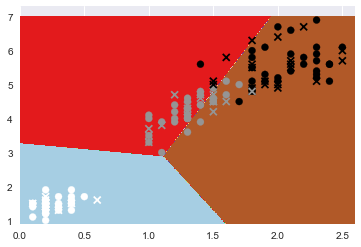

treningsnøyaktighet:  0.9
testnøyaktighet:  0.8


In [11]:
from sklearn.model_selection import train_test_split

# splitte inn i trenings og testdata
train_data, test_data,train_target, test_target = train_test_split(data_use, target, test_size=0.33, random_state=54)

# lage og trene en KNN klassifikator med k=10
clf = LogisticRegression()
clf.fit(train_data,train_target)

# tegne plot
plt.figure() # ny figur
plot_boundary(data_use,clf,padding=0.1,plot_step=0.005) # tegn opp beslutningsgrensa
plt.scatter(train_data['PetalWidthCm'], train_data['PetalLengthCm'], marker='o', c=train_target) # tegn treningsdata med sirkler
plt.scatter( test_data['PetalWidthCm'],  test_data['PetalLengthCm'], marker='x', c=test_target) # tegn testdata med kryss
plt.show() # vis fram figuren

#TODO: bruke hjelpefunksjon for å skrive ut trening og testnøyaktighet
print ("treningsnøyaktighet: ",np.mean(clf.predict(train_data)==train_target))
print ("testnøyaktighet: ",np.mean(clf.predict(test_data)==test_target))